In [1]:
####################### BLOCK 1: IMPORTS AND UTILITIES #######################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage


def prepare_data(data, selected_features):
    if isinstance(data, pd.DataFrame):
        if isinstance(selected_features[0], str):
            X = data[selected_features].values
            feature_names = selected_features
        else:
            X = data.iloc[:, selected_features].values
            feature_names = data.columns[selected_features].tolist()
    else:
        X = data[:, selected_features]
        feature_names = [f"Feature {i}" for i in selected_features]
    
    return X, feature_names

def plot_clusters(X, labels, feature_names, title="Clustering Results", ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    
    for label, color in zip(unique_labels, colors):
        mask = labels == label
        ax.scatter(X[mask, 0], X[mask, 1], c=[color], label=f'Cluster {label}')
    
    ax.set_title(title)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.legend()
    return ax


def plot_clusters_comparison(X, labels, feature_names, color_feature_idx, title="Clustering Results", ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    # Get unique labels
    unique_labels = np.unique(labels)
    
    # Different markers for different clusters
    markers = ['o', '^', 's', 'D'] 
    
    # Create scatter plot for each cluster
    for label, marker in zip(unique_labels, markers):
        mask = labels == label
        scatter = ax.scatter(X[mask, 0], 
                           X[mask, 1],
                           c=X[mask, color_feature_idx],
                           marker=marker,
                           label=f'Group {label}',
                           cmap='rainbow',
                           alpha=0.7)
    
    plt.colorbar(scatter, label=feature_names[color_feature_idx])
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title(title)
    ax.legend()
    
    return ax

def plot_clusters_by_membership(data, labels, plot_features, title="Clustering Results", ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    
    for label, color in zip(unique_labels, colors):
        mask = labels == label
        ax.scatter(data[plot_features[0]][mask], 
                  data[plot_features[1]][mask], 
                  c=[color], 
                  label=f'Group {label}',
                  alpha=0.7)
    
    ax.set_xlabel(plot_features[0])
    ax.set_ylabel(plot_features[1])
    ax.set_title(title)
    ax.legend()
    return ax

def plot_clusters_with_dor(data, labels, plot_features, dor_values, title="Clustering Results", ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create discrete DoR groups
    dor_groups = np.zeros_like(dor_values)
    dor_groups[(dor_values >= 0.3) & (dor_values < 0.6)] = 1
    dor_groups[dor_values >= 0.6] = 2
    
    # Define colors for each group
    colors = ['blue', 'green', 'red']
    labels = ['DoR 0-0.3', 'DoR 0.3-0.6', 'DoR 0.6-1.0']
    
    # Plot each DoR group
    for i, (color, label) in enumerate(zip(colors, labels)):
        mask = dor_groups == i
        if np.any(mask):
            ax.scatter(data[plot_features[0]][mask],
                      data[plot_features[1]][mask],
                      c=color,
                      label=label,
                      alpha=0.7)
    
    ax.set_xlabel(plot_features[0])
    ax.set_ylabel(plot_features[1])
    ax.set_title(title)
    ax.legend()
    return ax

In [2]:
####################### BLOCK 2: K-MEANS #######################
def kmeans_clustering(data, selected_features, n_clusters=3):
    X, feature_names = prepare_data(data, selected_features)
    
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)    

    
    # Fit K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++', n_init=100) #or init = k-means++???
    labels = kmeans.fit_predict(X_scaled)
    
    # Plot results
    #plot_clusters(X, labels, feature_names, "K-Means Clustering")
    #plt.show()
    return kmeans, labels



In [3]:
####################### BLOCK 3: DBSCAN #######################
def dbscan_clustering(data, selected_features, eps=15, min_samples=20):
    # Prepare data
    X, feature_names = prepare_data(data, selected_features)
    
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    
    # #plot results
    #plot_clusters(X, labels, feature_names, "DBSCAN Clustering")
    #plt.show()
    
    return dbscan, labels

In [4]:
####################### BLOCK 4: MEAN SHIFT #######################
def meanshift_clustering(data, selected_features):

    # Prepare data
    X, feature_names = prepare_data(data, selected_features)
    
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit Mean-Shift
    ms = MeanShift(bandwidth=2)
    labels = ms.fit_predict(X_scaled)
    
    # Plot results
    #plot_clusters(X, labels, feature_names, "Mean-Shift Clustering")
    #plt.show()
    
    return ms, labels

In [5]:
"""def gmm_clustering(data, selected_features, n_components=3):
    # Prepare data
    X, feature_names = prepare_data(data, selected_features)
    
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit GMM
    gmm = GaussianMixture(n_components=n_components, random_state=42, n_init=10)
    labels = gmm.fit_predict(X_scaled)
    
    # Plot results
    #plot_clusters(X, labels, feature_names, "Gaussian Mixture Clustering")
    #plt.show()
    
    return gmm, labels"""

def gmm_clustering(data, selected_features, n_components=3):
    X, feature_names = prepare_data(data, selected_features)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Try different covariance types
    covariance_types = ['full', 'tied', 'diag', 'spherical']
    best_bic = np.inf
    best_gmm = None
    
    for cv_type in covariance_types:
        gmm = GaussianMixture(
            n_components=n_components,
            covariance_type=cv_type,
            random_state=42,
            n_init=100,  # Increased from 10
            max_iter=300,  # Added max iterations
            reg_covar=1e-6,  # Added regularization
            init_params='kmeans'
        )
        
        gmm.fit(X_scaled)
        bic = gmm.bic(X_scaled)
        
        if bic < best_bic:
            best_bic = bic
            best_gmm = gmm
    
    labels = best_gmm.fit_predict(X_scaled)
    return best_gmm, labels    


In [6]:
####################### BLOCK 6: HIERARCHICAL #######################
def hierarchical_clustering(data, selected_features, n_clusters=3):
    # Prepare data
    X, feature_names = prepare_data(data, selected_features)
    
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit Hierarchical Clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hc.fit_predict(X_scaled)
    
    # Plot results
    #plot_clusters(X, labels, feature_names, "Hierarchical Clustering")
    #plt.show()
    
    return hc, labels



def plot_dendrogram(data, selected_features, method='ward', figsize=(10,7)):

    # Prepare and scale data
    X, feature_names = prepare_data(data, selected_features)
    X_scaled = StandardScaler().fit_transform(X)
    
    # Calculate linkage matrix
    Z = linkage(X_scaled, method=method)
    
    # Plot
    plt.figure(figsize=figsize)
    plt.title('Hierarchical Clustering Dendrogram')
    dendrogram(Z)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()
    
    return Z


# USAGE + PLOTTING


In [7]:
"""select from ['GALAXY ID', 'ra', 'dec', 'plate', 'mjd', 'fiberid', 'objid', 'deVRad_r', 'deVRadErr_r', 'expRad_r', 'expRadErr_r', 'z', 'zErr', 'SNR', 'velDisp_SDSS', 'velDispErr_SDSS', 'velDisp_ppxf_full', 'velDisp_ppxf_err_full', 'velDisp_ppxf_res', 'velDisp_ppxf_err_res', 'logM*', 'errlogM*', 'logSFR', 'errlogSFR', 'logsSFR', 'errlogsSFR', 'petroR50Errkpc_r', 'petroR50kpc_r', 'deVRadkpc_r', 'deVRadErrkpc_r', 'expRadkpc_r', 'expRadErrkpc_r', 'fracDev_r', 'meanRad_r', 'meanRadErr_r', 'meanRadkpc_r', 'meanRadErrkpc_r', 'meanRad_kids', 'meanRadkpc_kids', 'Mgb_ssp', 'Fe_avg_ssp', 'Mgb_sigmacorr', 'Fe_avg_sigmacorr', 'MgFe', 'alphaFe_flag', 'univ_age', 'age_mean_mass', 'age_err_mass', 'age_mean_light', 'age_err_light', '[M/H]_mean_mass', '[M/H]_err_mass', '[M/H]_mean_light', '[M/H]_err_light', 'Mtbb3', 'Mtbb3_unr', 'Mtbb3_reg', 'Mtbb3_alphaplus', 'Mtbb3_alphamin', 't_75', 't_75_unr', 't_75_reg', 't_75_alphaplus', 't_75_alphamin', 't_90', 't_90_unr', 't_90_reg', 't_90_alphaplus', 't_90_alphamin', 't_100', 't_100_unr', 't_100_reg', 't_100_alphaplus', 't_100_alphamin', 'DoR']"""


clustering_features = ['MgFe', '[M/H]_mean_mass', 'velDisp_ppxf_res', 'age_mean_mass'] #, 'logM*','meanRadkpc_r', 'Mtbb3', 't_75', 't_100']

plot_features = ['MgFe', 'age_mean_mass', '[M/H]_mean_mass', 'velDisp_ppxf_res'] 

df = pd.read_csv('data/E-INSPIRE_I_master_catalogue.csv')
df = df.sample(frac=1).reset_index(drop=True)

In [8]:
def hdbscan_clustering(data, selected_features, min_cluster_size=40, min_samples=None):
    import hdbscan
    
    # Prepare data
    X, feature_names = prepare_data(data, selected_features)
    
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit HDBSCAN
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=min_cluster_size,
        min_samples=min_samples,
        metric='euclidean',
        cluster_selection_method='eom'  # Excess of Mass
    )
    labels = clusterer.fit_predict(X_scaled)
    
    return clusterer, labels

def spectral_clustering(data, selected_features, n_clusters=3, affinity='nearest_neighbors'):
    from sklearn.cluster import SpectralClustering
    
    # Prepare data
    X, feature_names = prepare_data(data, selected_features)
    
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit Spectral Clustering
    spectral = SpectralClustering(
        n_clusters=n_clusters,
        affinity=affinity,
        n_init=100,
        random_state=42,
        assign_labels='kmeans'
    )
    labels = spectral.fit_predict(X_scaled)
    
    return spectral, labels

In [9]:
####################### BLOCK 7: USAGE EXAMPLES #######################
df = pd.read_csv('data/E-INSPIRE_I_master_catalogue.csv')
df = df.sample(frac=1).reset_index(drop=True)

selected_features = clustering_features
dor_values = df['DoR'].values  # Get DoR separately for coloring

n_clusters_kmeans = 3
n_clusters_gmm=3
n_clusters_hier = 3


# Gonna try df thing
# df['MgFe'] = df['MgFe'] + np.random.normal(0, 0.01, len(df))



kmeans_model, kmeans_labels = kmeans_clustering(df, selected_features, n_clusters=n_clusters_kmeans)

gmm_model, gmm_labels = gmm_clustering(df, selected_features, n_components=n_clusters_gmm)

hc_model, hc_labels = hierarchical_clustering(df, selected_features, n_clusters=n_clusters_hier)


# hdbscan_model, hdbscan_labels = hdbscan_clustering(df, selected_features, min_cluster_size=5)
# spectral_model, spectral_labels = spectral_clustering(df, selected_features, n_clusters=3)


# NEWLY trying



"""
# 2. DBSCAN Example
print("\n=== DBSCAN Clustering ===")
# Try different eps values
for eps in [0.3, 0.5, 0.7]:
    dbscan_model, dbscan_labels = dbscan_clustering(df, selected_features, 
                                                  eps=eps, 
                                                  min_samples=5)
    # Count samples in each cluster (-1 is noise)
    unique, counts = np.unique(dbscan_labels, return_counts=True)
    print(f"\nDBSCAN with eps={eps}:")
    print(dict(zip(unique, counts)))
    print(f"Number of clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")

"""




"""# 3. Mean-Shift Example
print("\n=== Mean-Shift Clustering ===")
ms_model, ms_labels = meanshift_clustering(df, selected_features)
# Count samples in each cluster
unique, counts = np.unique(ms_labels, return_counts=True)
print("Mean-Shift clusters:")
print(dict(zip(unique, counts)))
print(f"Number of clusters found: {len(unique)}")"""


"""
Summary statistics:
# Count samples in each cluster
unique, counts = np.unique(hc_labels, return_counts=True)
print(f"\nHierarchical with {n_clusters} clusters:")
print(dict(zip(unique, counts)))"""

# Z = plot_dendrogram(df, selected_features)

'\nSummary statistics:\n# Count samples in each cluster\nunique, counts = np.unique(hc_labels, return_counts=True)\nprint(f"\nHierarchical with {n_clusters} clusters:")\nprint(dict(zip(unique, counts)))'

In [10]:
methods = {
   "K-Means": kmeans_labels,
   "GMM": gmm_labels,
   "Hierarchical": hc_labels,   
}


METHOD: K-Means


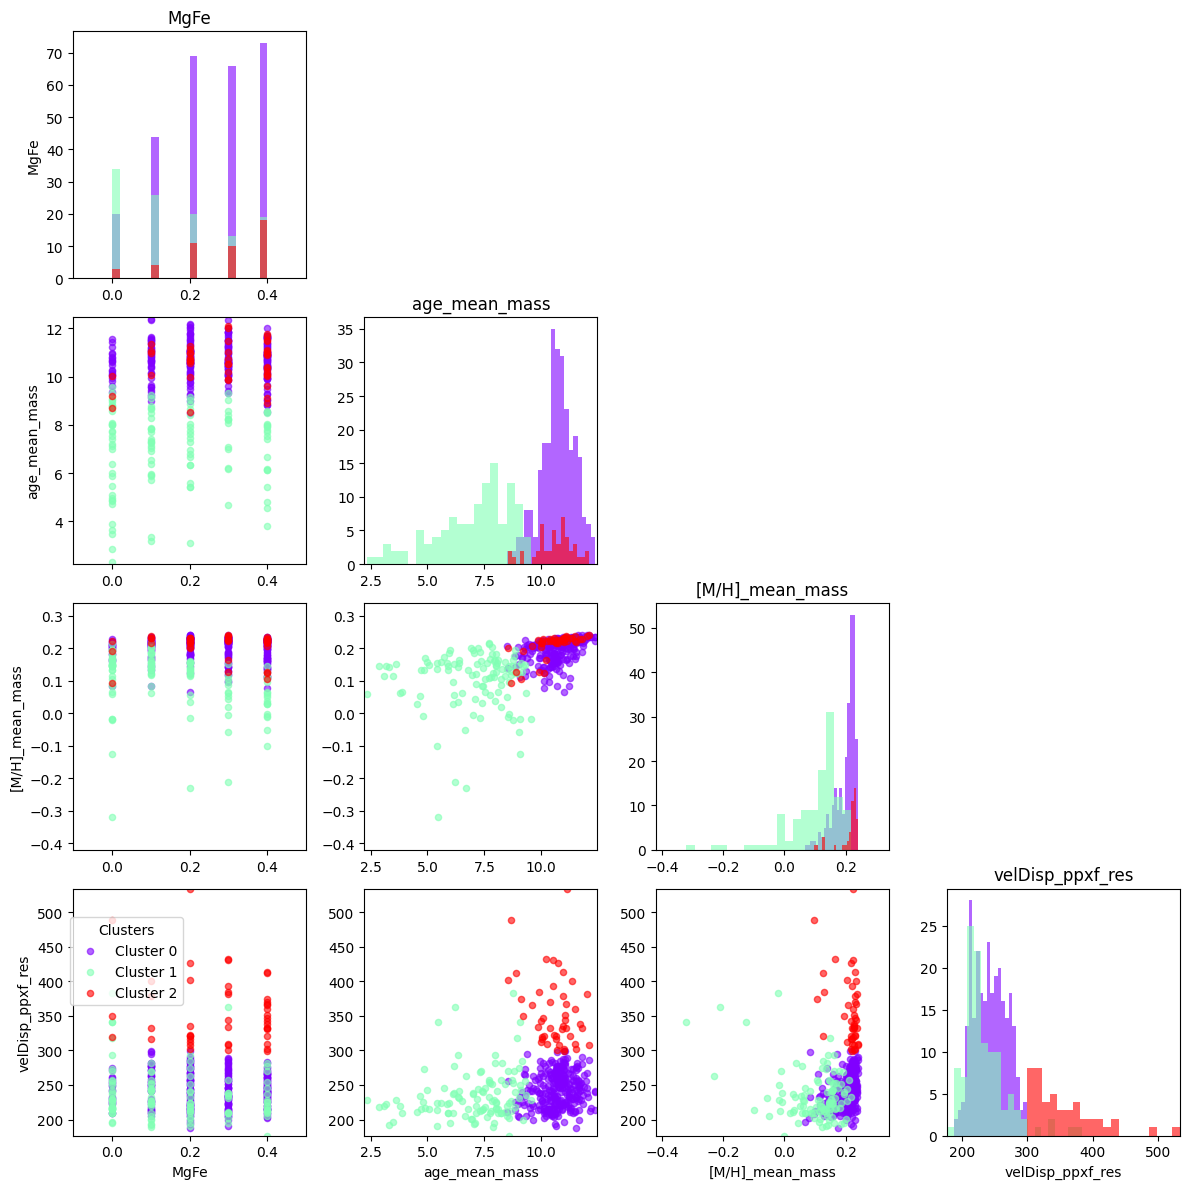

METHOD: GMM


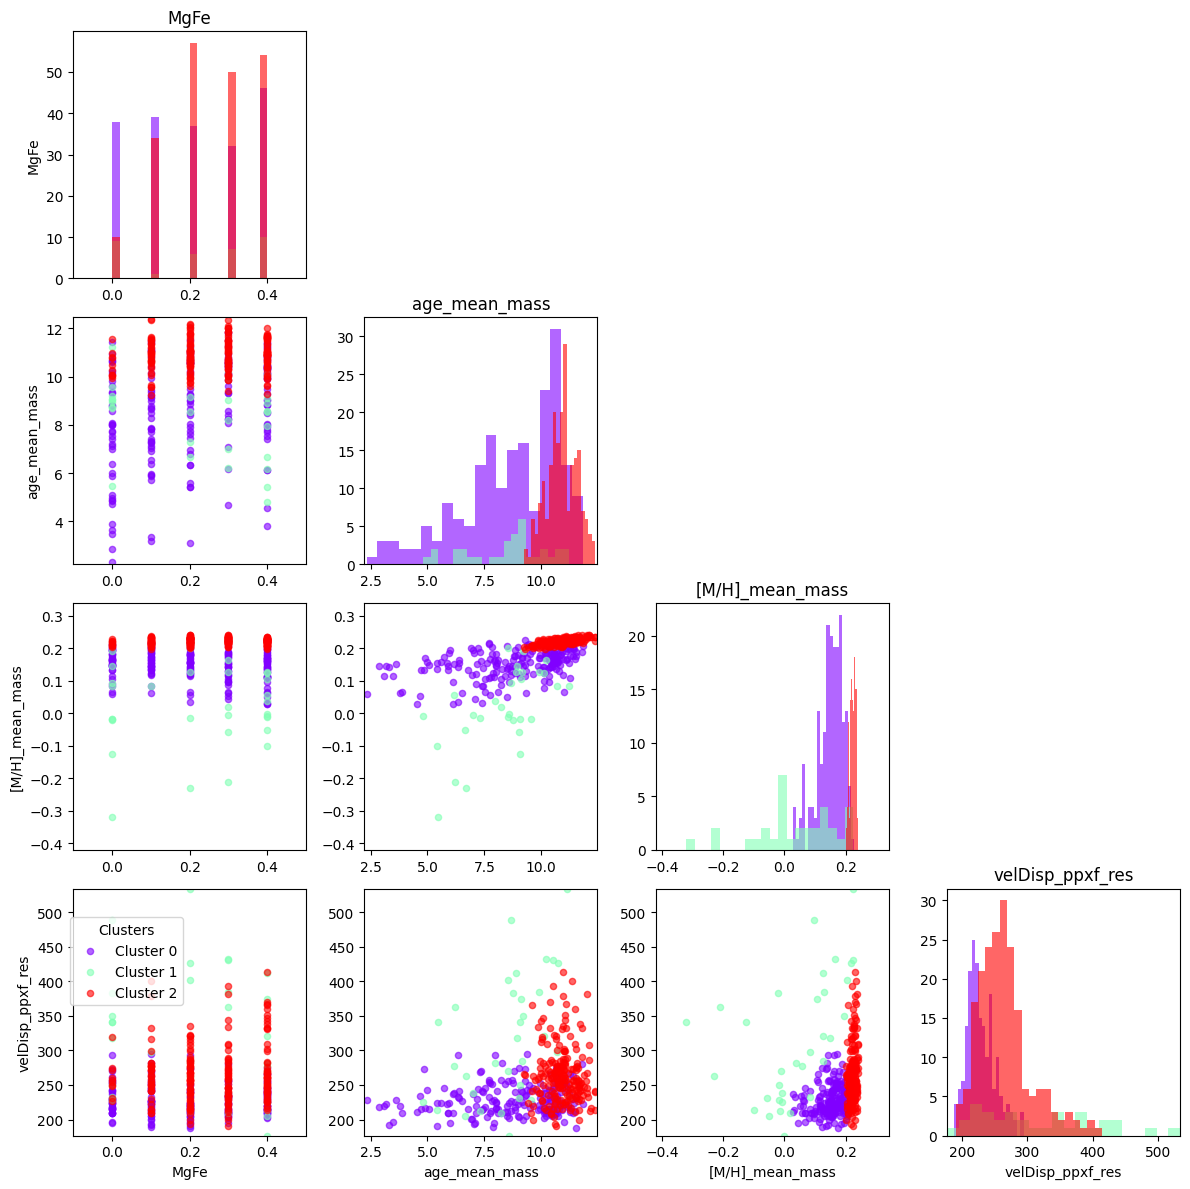

METHOD: Hierarchical


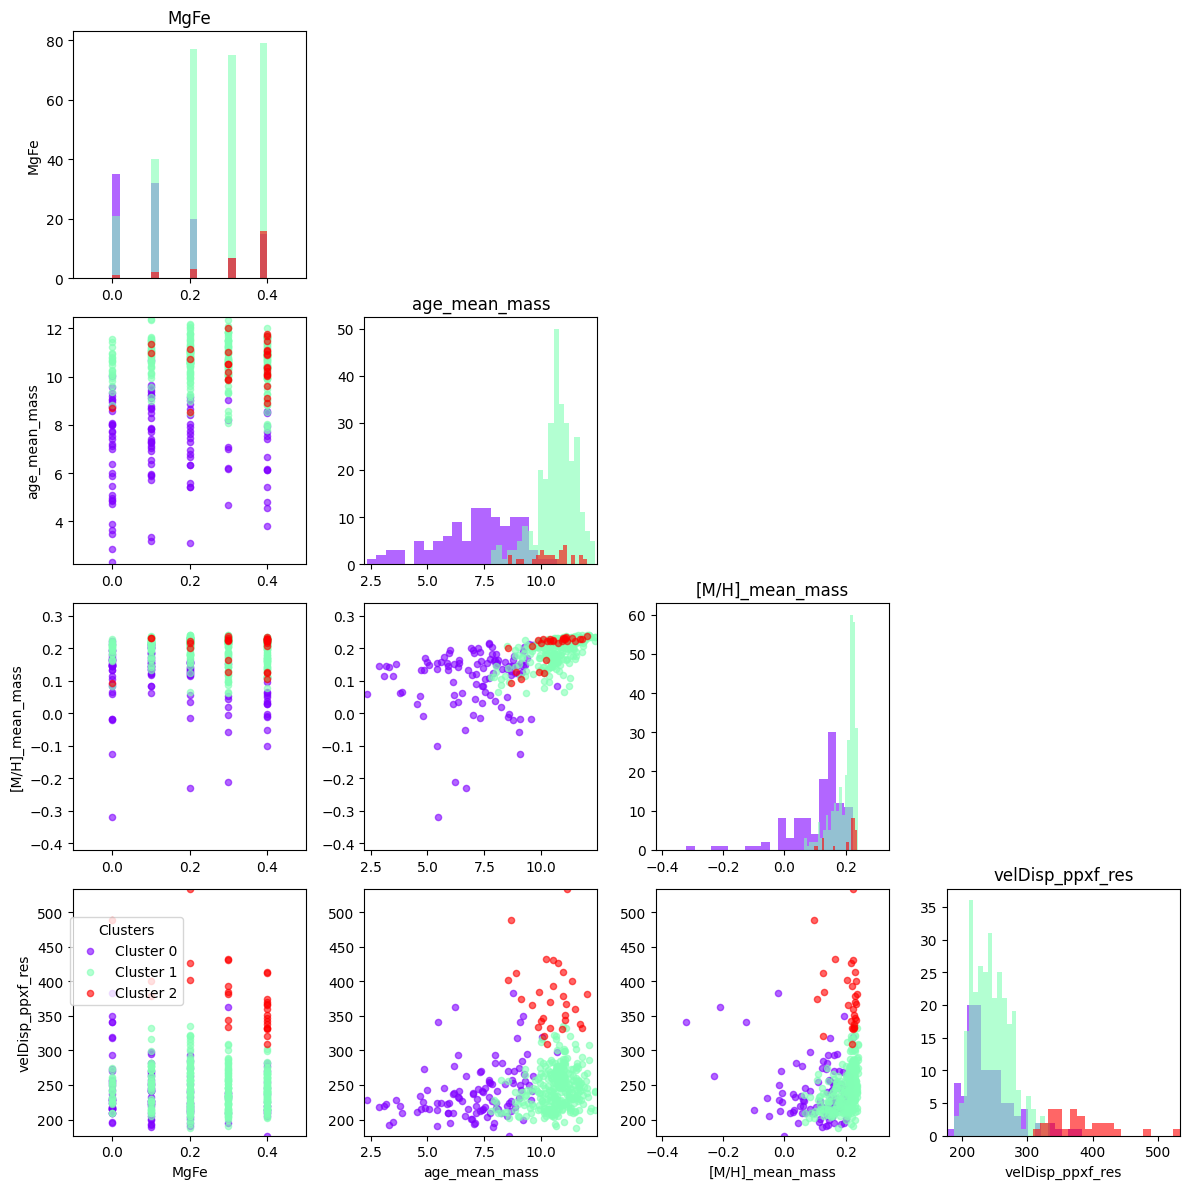

In [11]:
def make_corner_plot(data, labels, plot_features, method_name, figsize=(12, 12)):
    n_features = len(plot_features)
    fig, axes = plt.subplots(n_features, n_features, figsize=figsize)
    
    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    
    padding = 0.1
    
    for i in range(n_features):
        for j in range(n_features):
            ax = axes[i, j]
            
            if i < j:  # Upper triangle
                ax.set_visible(False)
                continue
                
            xmin = min(data[plot_features[j]]) - padding
            xmax = max(data[plot_features[j]]) + padding
            ymin = min(data[plot_features[i]]) - padding
            ymax = max(data[plot_features[i]]) + padding
                
            if i == j:  # Diagonal
                for label, color in zip(unique_labels, colors):
                    mask = labels == label
                    ax.hist(data[plot_features[i]][mask], bins=20, 
                           color=color, alpha=0.6, label=f'Cluster {label}')
                ax.set_xlim(xmin, xmax)
                ax.set_title(plot_features[i])
            else:  # Lower triangle
                for label, color in zip(unique_labels, colors):
                    mask = labels == label
                    ax.scatter(data[plot_features[j]][mask], 
                             data[plot_features[i]][mask],
                             c=[color], alpha=0.6, s=20, label=f'Cluster {label}')
                ax.set_xlim(xmin, xmax)
                ax.set_ylim(ymin, ymax)
            
            # Labels
            if i == n_features-1:
                ax.set_xlabel(plot_features[j])
            if j == 0:
                ax.set_ylabel(plot_features[i])
                
            # Only show legend once in the first subplot
            if i == n_features-1 and j == 0:
                ax.legend(title="Clusters", bbox_to_anchor=(0.5, 0.5))

    # plt.suptitle(f'{method_name} Corner Plot', y=1.02)
    plt.tight_layout()
    return fig

for method_name, labels in methods.items():
    print("METHOD:", method_name)
    fig = make_corner_plot(df, labels, plot_features, method_name)
    plt.show()

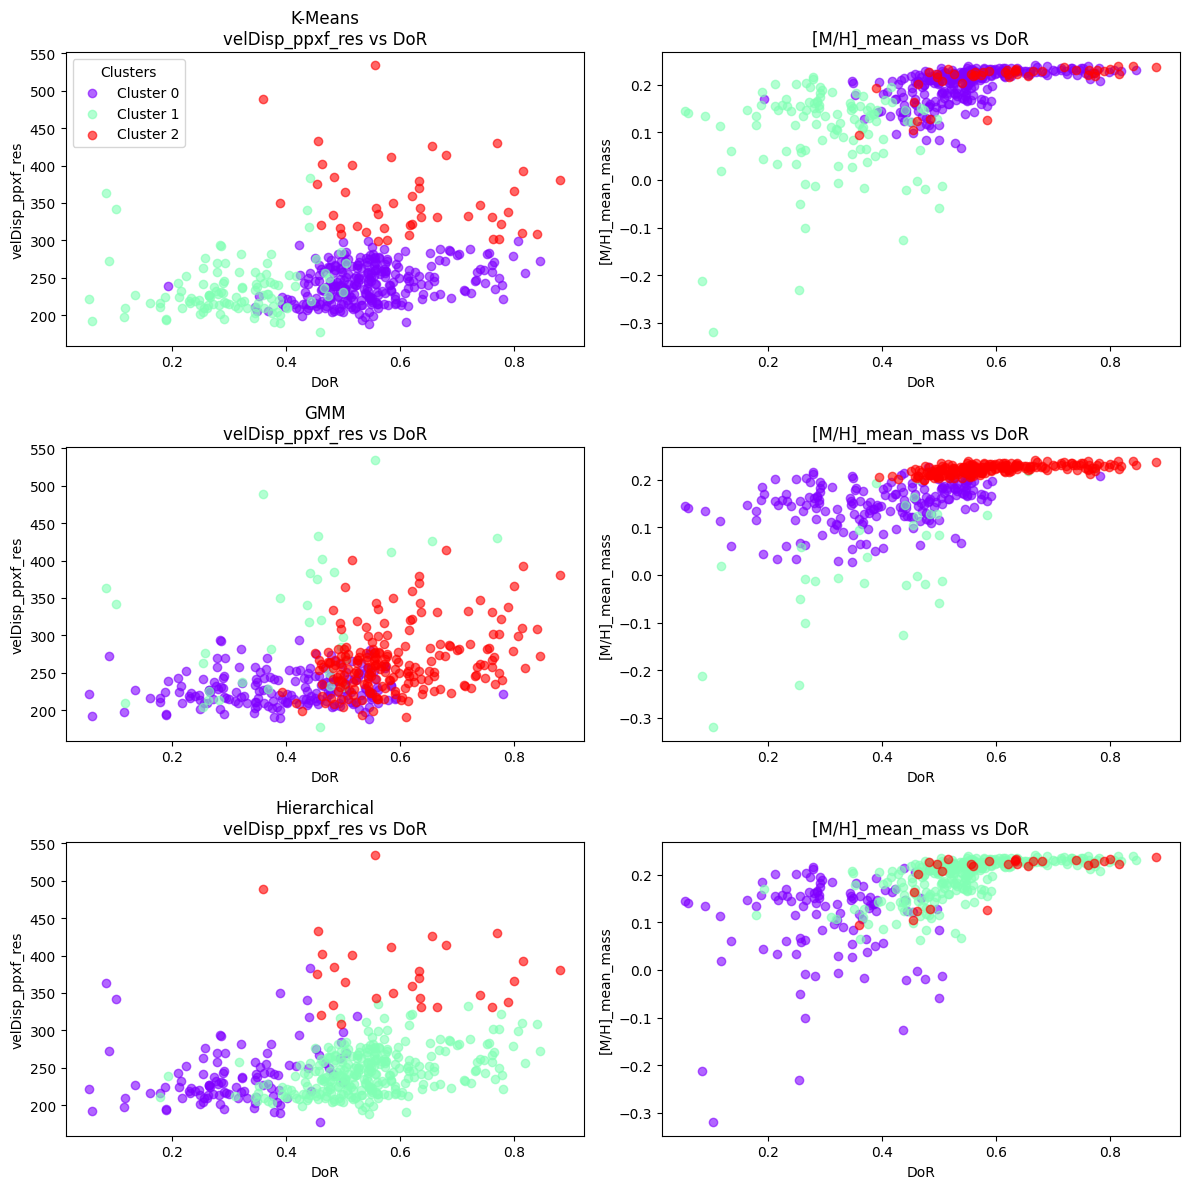

In [12]:
def plot_multi_method_features(data, methods, features, figsize=(15, 10)):
    n_methods = len(methods)
    n_features = len(features)
    
    fig, axes = plt.subplots(n_methods, n_features, figsize=figsize)
    if n_methods == 1:
        axes = axes.reshape(1, -1)
    
    # Get colors for clusters
    max_clusters = max(len(np.unique(labels)) for labels in methods.values())
    colors = plt.cm.rainbow(np.linspace(0, 1, max_clusters))
    
    for row, (method_name, labels) in enumerate(methods.items()):
        unique_labels = np.unique(labels)
        
        for col, feature in enumerate(features):
            ax = axes[row, col]
            
            # Plot scatter for each cluster
            for label, color in zip(unique_labels, colors):
                mask = labels == label
                ax.scatter(data['DoR'][mask], data[feature][mask],
                          c=[color], alpha=0.6, label=f'Cluster {label}')
            
            ax.set_xlabel('DoR')
            ax.set_ylabel(feature)
            
            # Only show method name on leftmost plot of each row
            if col == 0:
                ax.set_title(f'{method_name}\n{feature} vs DoR')
            else:
                ax.set_title(f'{feature} vs DoR')
            
            # Only show legend for first plot
            if row == 0 and col == 0:
                ax.legend(title="Clusters")
                
    plt.tight_layout()
    return fig

# Use the function
features = ['velDisp_ppxf_res', '[M/H]_mean_mass']
fig = plot_multi_method_features(df, methods, features, figsize=(12, 12))
plt.show()

In [13]:
def export_clustering_results(df, methods, output_dir='cluster_results'):
    import os
    
    def relabel_by_dor_and_mgfe(labels, df):
        # Calculate mean metrics for each cluster
        cluster_stats = {}
        for label in np.unique(labels):
            mask = labels == label
            cluster_stats[label] = {
                'DoR': df[mask]['DoR'].mean(),
                'MgFe': df[mask]['MgFe'].mean(),
                'size': mask.sum()
            }
            print(f"\nOriginal Cluster {label}:")
            print(f"Mean DoR: {cluster_stats[label]['DoR']:.3f}")
            print(f"Mean MgFe: {cluster_stats[label]['MgFe']:.3f}")
            print(f"Size: {cluster_stats[label]['size']}")
        
        # Create mapping using both DoR and MgFe
        # Sort first by MgFe since it's more directly related to your science goals
        mapping = dict(enumerate(sorted(cluster_stats.keys(),
                                     key=lambda x: cluster_stats[x]['MgFe'],
                                     reverse=True)))
        
        print("\nCluster Mapping:")
        for new_label, old_label in mapping.items():
            print(f"Old cluster {old_label} → New cluster {new_label}")
            
        return np.array([mapping[label] for label in labels])
    
    # Create output directory
    output_path = os.path.join(os.getcwd(), output_dir)
    os.makedirs(output_path, exist_ok=True)
    
    # Create SDSS identifiers
    sdss_ids = [f"spec-{int(plate):04d}-{int(mjd):05d}-{int(fiber):04d}.fits" 
                for plate, mjd, fiber in zip(df['plate'], df['mjd'], df['fiberid'])]
    
    # Export results with relabeled clusters
    for method_name, labels in methods.items():
        print(f"\nRelabeling {method_name} clusters:")
        relabeled_labels = relabel_by_dor_and_mgfe(labels, df)
        results_df = pd.DataFrame({
            'SDSS_ID': sdss_ids,
            'Cluster': relabeled_labels
        })
        
        filename = os.path.join(output_path, f'{method_name.lower().replace(" ", "_")}_clusters.csv')
        results_df.to_csv(filename, index=False)

export_clustering_results(df, methods)


Relabeling K-Means clusters:

Original Cluster 0:
Mean DoR: 0.547
Mean MgFe: 0.247
Size: 272

Original Cluster 1:
Mean DoR: 0.308
Mean MgFe: 0.162
Size: 112

Original Cluster 2:
Mean DoR: 0.619
Mean MgFe: 0.278
Size: 46

Cluster Mapping:
Old cluster 2 → New cluster 0
Old cluster 0 → New cluster 1
Old cluster 1 → New cluster 2

Relabeling GMM clusters:

Original Cluster 0:
Mean DoR: 0.401
Mean MgFe: 0.205
Size: 192

Original Cluster 1:
Mean DoR: 0.404
Mean MgFe: 0.224
Size: 33

Original Cluster 2:
Mean DoR: 0.593
Mean MgFe: 0.251
Size: 205

Cluster Mapping:
Old cluster 2 → New cluster 0
Old cluster 1 → New cluster 1
Old cluster 0 → New cluster 2

Relabeling Hierarchical clusters:

Original Cluster 0:
Mean DoR: 0.313
Mean MgFe: 0.140
Size: 109

Original Cluster 1:
Mean DoR: 0.548
Mean MgFe: 0.252
Size: 292

Original Cluster 2:
Mean DoR: 0.610
Mean MgFe: 0.321
Size: 29

Cluster Mapping:
Old cluster 2 → New cluster 0
Old cluster 1 → New cluster 1
Old cluster 0 → New cluster 2
